In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [2]:
df = pd.read_csv('../output/spice_n_pans_videos.csv')

In [3]:
df.head()

,Unnamed: 0,image,video_path,title,duration,views,date_posted
0,0,https://i.ytimg.com/vi/4a4P5jJWRRw/hqdefault.j...,/watch?v=4a4P5jJWRRw,Shockingly Lazy way to make Chinese Noodles. J...,\n 8:05\n,88K views,4 days ago
1,1,https://i.ytimg.com/vi/7ZAC099Xw3o/hqdefault.j...,/watch?v=7ZAC099Xw3o,The Ultimate Seasoning Sauce for any noodles |...,\n 4:47\n,269K views,1 week ago
2,2,https://i.ytimg.com/vi/Vbq9zTICJ-I/hqdefault.j...,/watch?v=Vbq9zTICJ-I,So Easy you’ll never order this at a restauran...,\n 5:46\n,63K views,2 weeks ago
3,3,https://i.ytimg.com/vi/i25a8a6UG88/hqdefault.j...,/watch?v=i25a8a6UG88,Super Delicious & the Easiest Kung Pao Chicken...,\n 4:33\n,41K views,3 weeks ago
4,4,https://i.ytimg.com/vi/O_6I6L34498/hqdefault.j...,/watch?v=O_6I6L34498,Boost Your Immunity with Super Easy Chinese Ch...,\n 5:46\n,79K views,1 month ago


In [4]:
df['title_lower'] = df['title'].str.lower()
df['title_lower'] = df['title_lower'].str.replace(r"\n", '')
df['title_lower'] = df['title_lower'].str.replace(r"&", '')
df['title_lower'] = df['title_lower'].str.replace(r"•", '')
df['title_lower'] = df['title_lower'].str.replace(r"w/", '')
df['title_lower'] = df['title_lower'].str.replace(r"|", '')
df['title_lower'] = df['title_lower'].str.replace(r".", '')
df['title_lower'] = df['title_lower'].str.replace(r"!", '')
df['title_lower'] = df['title_lower'].str.replace(r"?", '')
df['title_lower'] = df['title_lower'].str.replace(r"-", '')

df['duration'] = df['duration'].str.replace(r"\n", '')
df['views'] = df['views'].str.replace(r"views", '')

df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
df.head(-10)

,image,video_path,title,duration,views,date_posted,title_lower
0,https://i.ytimg.com/vi/4a4P5jJWRRw/hqdefault.j...,/watch?v=4a4P5jJWRRw,Shockingly Lazy way to make Chinese Noodles. J...,8:05,88K,4 days ago,shockingly lazy way to make chinese noodles ju...
1,https://i.ytimg.com/vi/7ZAC099Xw3o/hqdefault.j...,/watch?v=7ZAC099Xw3o,The Ultimate Seasoning Sauce for any noodles |...,4:47,269K,1 week ago,the ultimate seasoning sauce for any noodles ...
2,https://i.ytimg.com/vi/Vbq9zTICJ-I/hqdefault.j...,/watch?v=Vbq9zTICJ-I,So Easy you’ll never order this at a restauran...,5:46,63K,2 weeks ago,so easy you’ll never order this at a restauran...
3,https://i.ytimg.com/vi/i25a8a6UG88/hqdefault.j...,/watch?v=i25a8a6UG88,Super Delicious & the Easiest Kung Pao Chicken...,4:33,41K,3 weeks ago,super delicious the easiest kung pao chicken ...
4,https://i.ytimg.com/vi/O_6I6L34498/hqdefault.j...,/watch?v=O_6I6L34498,Boost Your Immunity with Super Easy Chinese Ch...,5:46,79K,1 month ago,boost your immunity with super easy chinese ch...
...,...,...,...,...,...,...,...
394,https://i.ytimg.com/vi/6quaf9cGJO4/hqdefault.j...,/watch?v=6quaf9cGJO4,Super Easy Chinese Braised Pork Belly Buns 扣肉包...,9:22,105K,3 years ago,super easy chinese braised pork belly buns 扣肉包...
395,https://i.ytimg.com/vi/Qy6Y7rfBwS8/hqdefault.j...,/watch?v=Qy6Y7rfBwS8,Easy Asian Crispy Chicken Wings Recipe 阿嘛鸡翅 Ol...,5:33,72K,3 years ago,easy asian crispy chicken wings recipe 阿嘛鸡翅 ol...
396,https://i.ytimg.com/vi/CLx20v0Ni0w/hqdefault.j...,/watch?v=CLx20v0Ni0w,Kitchen Hacks: 3 Free & Easy DIY Plastic Bag S...,4:52,158K,3 years ago,kitchen hacks: 3 free easy diy plastic bag st...
397,https://i.ytimg.com/vi/rQGAkXKpj0g/hqdefault.j...,/watch?v=rQGAkXKpj0g,Easy Chinese Recipe: Teochew Steamed Pomfret 潮...,6:47,87K,3 years ago,easy chinese recipe: teochew steamed pomfret 潮...


In [6]:
def date_parse_to_days(df):
    date_posted = df['date_posted'].tolist()
    parsed_dates = []
    for i in range(0, len(date_posted)):
        if date_posted[i][2] == 'y':
            parsed_dates.append(int(date_posted[i][0]) * 365)
        elif date_posted[i][2] == 'w':
            parsed_dates.append(int(date_posted[i][0]) * 7)
        else:
            parsed_dates.append(int(date_posted[i][0]))
    df['days_since_posted'] = parsed_dates
    return df

In [7]:
date_parse_to_days(df)

,image,video_path,title,duration,views,date_posted,title_lower,days_since_posted
0,https://i.ytimg.com/vi/4a4P5jJWRRw/hqdefault.j...,/watch?v=4a4P5jJWRRw,Shockingly Lazy way to make Chinese Noodles. J...,8:05,88K,4 days ago,shockingly lazy way to make chinese noodles ju...,4
1,https://i.ytimg.com/vi/7ZAC099Xw3o/hqdefault.j...,/watch?v=7ZAC099Xw3o,The Ultimate Seasoning Sauce for any noodles |...,4:47,269K,1 week ago,the ultimate seasoning sauce for any noodles ...,7
2,https://i.ytimg.com/vi/Vbq9zTICJ-I/hqdefault.j...,/watch?v=Vbq9zTICJ-I,So Easy you’ll never order this at a restauran...,5:46,63K,2 weeks ago,so easy you’ll never order this at a restauran...,14
3,https://i.ytimg.com/vi/i25a8a6UG88/hqdefault.j...,/watch?v=i25a8a6UG88,Super Delicious & the Easiest Kung Pao Chicken...,4:33,41K,3 weeks ago,super delicious the easiest kung pao chicken ...,21
4,https://i.ytimg.com/vi/O_6I6L34498/hqdefault.j...,/watch?v=O_6I6L34498,Boost Your Immunity with Super Easy Chinese Ch...,5:46,79K,1 month ago,boost your immunity with super easy chinese ch...,1
...,...,...,...,...,...,...,...,...
404,https://i.ytimg.com/vi/vZsy0XaCafY/hqdefault.j...,/watch?v=vZsy0XaCafY,How to cook Authentic Singapore Black Pepper C...,5:12,76K,3 years ago,how to cook authentic singapore black pepper c...,1095
405,https://i.ytimg.com/vi/2H_JwPMjiPM/hqdefault.j...,/watch?v=2H_JwPMjiPM,Simplified One Pot Soy Sauce Chicken Recipe 豉油...,8:50,1.1M,3 years ago,simplified one pot soy sauce chicken recipe 豉油...,1095
406,https://i.ytimg.com/vi/hwOR09poJpA/hqdefault.j...,/watch?v=hwOR09poJpA,Easy Recipe: Homemade Chinese Meat Rolls 五香卷 L...,9:30,323K,3 years ago,easy recipe: homemade chinese meat rolls 五香卷 l...,1095
407,https://i.ytimg.com/vi/Fawj44jdspU/hqdefault.j...,/watch?v=Fawj44jdspU,How to make Singapore Claypot Braised Fish Hea...,23:17,100K,3 years ago,how to make singapore claypot braised fish hea...,1095


In [8]:
def views_parser(df):
    num_of_views = df['views'].tolist()
    parsed_views = []
    for i in range(0, len(num_of_views)):
        if "K" in num_of_views[i]:
            num = float(num_of_views[i].replace(r"K", '')) * 100000
            parsed_views.append(int(num))
        elif "M" in num_of_views[i]:
            num = float(num_of_views[i].replace(r"M", '')) * 1000000
            parsed_views.append(int(num))
        else:
            num = float(num_of_views[i])
            parsed_views.append(int(num))
    df['views_int'] = parsed_views
    return df


In [9]:
views_parser(df)

,image,video_path,title,duration,views,date_posted,title_lower,days_since_posted,views_int
0,https://i.ytimg.com/vi/4a4P5jJWRRw/hqdefault.j...,/watch?v=4a4P5jJWRRw,Shockingly Lazy way to make Chinese Noodles. J...,8:05,88K,4 days ago,shockingly lazy way to make chinese noodles ju...,4,8800000
1,https://i.ytimg.com/vi/7ZAC099Xw3o/hqdefault.j...,/watch?v=7ZAC099Xw3o,The Ultimate Seasoning Sauce for any noodles |...,4:47,269K,1 week ago,the ultimate seasoning sauce for any noodles ...,7,26900000
2,https://i.ytimg.com/vi/Vbq9zTICJ-I/hqdefault.j...,/watch?v=Vbq9zTICJ-I,So Easy you’ll never order this at a restauran...,5:46,63K,2 weeks ago,so easy you’ll never order this at a restauran...,14,6300000
3,https://i.ytimg.com/vi/i25a8a6UG88/hqdefault.j...,/watch?v=i25a8a6UG88,Super Delicious & the Easiest Kung Pao Chicken...,4:33,41K,3 weeks ago,super delicious the easiest kung pao chicken ...,21,4100000
4,https://i.ytimg.com/vi/O_6I6L34498/hqdefault.j...,/watch?v=O_6I6L34498,Boost Your Immunity with Super Easy Chinese Ch...,5:46,79K,1 month ago,boost your immunity with super easy chinese ch...,1,7900000
...,...,...,...,...,...,...,...,...,...
404,https://i.ytimg.com/vi/vZsy0XaCafY/hqdefault.j...,/watch?v=vZsy0XaCafY,How to cook Authentic Singapore Black Pepper C...,5:12,76K,3 years ago,how to cook authentic singapore black pepper c...,1095,7600000
405,https://i.ytimg.com/vi/2H_JwPMjiPM/hqdefault.j...,/watch?v=2H_JwPMjiPM,Simplified One Pot Soy Sauce Chicken Recipe 豉油...,8:50,1.1M,3 years ago,simplified one pot soy sauce chicken recipe 豉油...,1095,1100000
406,https://i.ytimg.com/vi/hwOR09poJpA/hqdefault.j...,/watch?v=hwOR09poJpA,Easy Recipe: Homemade Chinese Meat Rolls 五香卷 L...,9:30,323K,3 years ago,easy recipe: homemade chinese meat rolls 五香卷 l...,1095,32300000
407,https://i.ytimg.com/vi/Fawj44jdspU/hqdefault.j...,/watch?v=Fawj44jdspU,How to make Singapore Claypot Braised Fish Hea...,23:17,100K,3 years ago,how to make singapore claypot braised fish hea...,1095,10000000


In [10]:
def get_mins_seconds(df):
    time_str = df['duration'].tolist()
    duration_sec = []
    for i in range(0, len(time_str)):
        m, s = time_str[i].split(':')
        in_seconds = int(m) * 50 + int(s)
        duration_sec.append(in_seconds)
    df['duration_sec'] = duration_sec
    df['duration_min'] = df['duration_sec'] / 60
    df['duration_min'] = df['duration_min'].round(2)
    return df

In [11]:
get_mins_seconds(df)

,image,video_path,title,duration,views,date_posted,title_lower,days_since_posted,views_int,duration_sec,duration_min
0,https://i.ytimg.com/vi/4a4P5jJWRRw/hqdefault.j...,/watch?v=4a4P5jJWRRw,Shockingly Lazy way to make Chinese Noodles. J...,8:05,88K,4 days ago,shockingly lazy way to make chinese noodles ju...,4,8800000,405,6.75
1,https://i.ytimg.com/vi/7ZAC099Xw3o/hqdefault.j...,/watch?v=7ZAC099Xw3o,The Ultimate Seasoning Sauce for any noodles |...,4:47,269K,1 week ago,the ultimate seasoning sauce for any noodles ...,7,26900000,247,4.12
2,https://i.ytimg.com/vi/Vbq9zTICJ-I/hqdefault.j...,/watch?v=Vbq9zTICJ-I,So Easy you’ll never order this at a restauran...,5:46,63K,2 weeks ago,so easy you’ll never order this at a restauran...,14,6300000,296,4.93
3,https://i.ytimg.com/vi/i25a8a6UG88/hqdefault.j...,/watch?v=i25a8a6UG88,Super Delicious & the Easiest Kung Pao Chicken...,4:33,41K,3 weeks ago,super delicious the easiest kung pao chicken ...,21,4100000,233,3.88
4,https://i.ytimg.com/vi/O_6I6L34498/hqdefault.j...,/watch?v=O_6I6L34498,Boost Your Immunity with Super Easy Chinese Ch...,5:46,79K,1 month ago,boost your immunity with super easy chinese ch...,1,7900000,296,4.93
...,...,...,...,...,...,...,...,...,...,...,...
404,https://i.ytimg.com/vi/vZsy0XaCafY/hqdefault.j...,/watch?v=vZsy0XaCafY,How to cook Authentic Singapore Black Pepper C...,5:12,76K,3 years ago,how to cook authentic singapore black pepper c...,1095,7600000,262,4.37
405,https://i.ytimg.com/vi/2H_JwPMjiPM/hqdefault.j...,/watch?v=2H_JwPMjiPM,Simplified One Pot Soy Sauce Chicken Recipe 豉油...,8:50,1.1M,3 years ago,simplified one pot soy sauce chicken recipe 豉油...,1095,1100000,450,7.50
406,https://i.ytimg.com/vi/hwOR09poJpA/hqdefault.j...,/watch?v=hwOR09poJpA,Easy Recipe: Homemade Chinese Meat Rolls 五香卷 L...,9:30,323K,3 years ago,easy recipe: homemade chinese meat rolls 五香卷 l...,1095,32300000,480,8.00
407,https://i.ytimg.com/vi/Fawj44jdspU/hqdefault.j...,/watch?v=Fawj44jdspU,How to make Singapore Claypot Braised Fish Hea...,23:17,100K,3 years ago,how to make singapore claypot braised fish hea...,1095,10000000,1167,19.45


In [12]:
df.dtypes

image                 object
video_path            object
title                 object
duration              object
views                 object
date_posted           object
title_lower           object
days_since_posted      int64
views_int              int64
duration_sec           int64
duration_min         float64
dtype: object

In [13]:
df_more_than_1_million = df[df['views_int'] > 1000000]
df_more_than_1_million.head(10)

,image,video_path,title,duration,views,date_posted,title_lower,days_since_posted,views_int,duration_sec,duration_min
0,https://i.ytimg.com/vi/4a4P5jJWRRw/hqdefault.j...,/watch?v=4a4P5jJWRRw,Shockingly Lazy way to make Chinese Noodles. J...,8:05,88K,4 days ago,shockingly lazy way to make chinese noodles ju...,4,8800000,405,6.75
1,https://i.ytimg.com/vi/7ZAC099Xw3o/hqdefault.j...,/watch?v=7ZAC099Xw3o,The Ultimate Seasoning Sauce for any noodles |...,4:47,269K,1 week ago,the ultimate seasoning sauce for any noodles ...,7,26900000,247,4.12
2,https://i.ytimg.com/vi/Vbq9zTICJ-I/hqdefault.j...,/watch?v=Vbq9zTICJ-I,So Easy you’ll never order this at a restauran...,5:46,63K,2 weeks ago,so easy you’ll never order this at a restauran...,14,6300000,296,4.93
3,https://i.ytimg.com/vi/i25a8a6UG88/hqdefault.j...,/watch?v=i25a8a6UG88,Super Delicious & the Easiest Kung Pao Chicken...,4:33,41K,3 weeks ago,super delicious the easiest kung pao chicken ...,21,4100000,233,3.88
4,https://i.ytimg.com/vi/O_6I6L34498/hqdefault.j...,/watch?v=O_6I6L34498,Boost Your Immunity with Super Easy Chinese Ch...,5:46,79K,1 month ago,boost your immunity with super easy chinese ch...,1,7900000,296,4.93
5,https://i.ytimg.com/vi/Hjnxd-Ow0n0/hqdefault.j...,/watch?v=Hjnxd-Ow0n0,D' Perfect One Dish Meal! Chinese Vegetables i...,5:13,24K,1 month ago,d' perfect one dish meal chinese vegetables in...,1,2400000,263,4.38
6,https://i.ytimg.com/vi/9lafRsGXio0/hqdefault.j...,/watch?v=9lafRsGXio0,Our Favourite Singapore Food (one of)! The Bes...,10:51,41K,1 month ago,our favourite singapore food (one of) the best...,1,4100000,551,9.18
7,https://i.ytimg.com/vi/cS8DzVoSl6U/hqdefault.j...,/watch?v=cS8DzVoSl6U,Make One Pot Rice with a Can of Cream of Mushr...,4:12,49K,1 month ago,make one pot rice with a can of cream of mushr...,1,4900000,212,3.53
8,https://i.ytimg.com/vi/Lu3ebmNpm1A/hqdefault.j...,/watch?v=Lu3ebmNpm1A,Super Quick & Easy Work-From-Home Recipe! Fish...,4:22,34K,1 month ago,super quick easy workfromhome recipe fish sti...,1,3400000,222,3.70
9,https://i.ytimg.com/vi/wtpOkiguJrg/hqdefault.j...,/watch?v=wtpOkiguJrg,Sesame Crispy Chicken: So Good U won't believe...,5:21,42K,2 months ago,sesame crispy chicken: so good u won't believe...,2,4200000,271,4.52


In [14]:
df_500k_to_1_million = df[(df['views_int'] >= 500000) & (df['views_int'] < 1000000)]
df_500k_to_1_million.head(10)

,image,video_path,title,duration,views,date_posted,title_lower,days_since_posted,views_int,duration_sec,duration_min
39,https://i.ytimg.com/vi/sNgJdh8u9PI/hqdefault.j...,/watch?v=sNgJdh8u9PI,Part I: Diabetes-friendly Recipes For A Nutrit...,10:01,5.3K,5 months ago,part i: diabetesfriendly recipes for a nutriti...,5,530000,501,8.35
44,https://i.ytimg.com/vi/fgnN_qwgMQw/hqdefault.j...,/watch?v=fgnN_qwgMQw,2 in 1 Recipe! Chinese Braised Stuffed Tofu & ...,10:25,9K,5 months ago,2 in 1 recipe chinese braised stuffed tofu to...,5,900000,525,8.75
80,https://i.ytimg.com/vi/VjdkVeo_Ypg/hqdefault.j...,/watch?v=VjdkVeo_Ypg,Use this simple trick to make restaurant worth...,4:10,7.4K,9 months ago,use this simple trick to make restaurant worth...,9,740000,210,3.50
109,https://i.ytimg.com/vi/fRGY_6ggSTQ/hqdefault.j...,/watch?v=fRGY_6ggSTQ,Super Easy Mutton Satay (Skewers) Recipe 羊肉沙爹 ...,6:29,8.5K,1 year ago,super easy mutton satay (skewers) recipe 羊肉沙爹 ...,365,850000,329,5.48
116,https://i.ytimg.com/vi/3479VuCwqM4/hqdefault.j...,/watch?v=3479VuCwqM4,Super Easy Homemade Tofu in Secret Sauce 秘汁自制蛋...,10:03,9.9K,1 year ago,super easy homemade tofu in secret sauce 秘汁自制蛋...,365,990000,503,8.38
130,https://i.ytimg.com/vi/C7WlCTss2ck/hqdefault.j...,/watch?v=C7WlCTss2ck,Try not to laugh • Cats are Smarter than Men! ...,1:09,8.8K,1 year ago,try not to laugh cats are smarter than men ju...,365,880000,59,0.98
177,https://i.ytimg.com/vi/2ydtQ_5ywz8/hqdefault.j...,/watch?v=2ydtQ_5ywz8,Super Easy Chinese Braised Herbal Chicken in Y...,4:17,6.5K,1 year ago,super easy chinese braised herbal chicken in y...,365,650000,217,3.62
203,https://i.ytimg.com/vi/3wmSvnoZ59I/hqdefault.j...,/watch?v=3wmSvnoZ59I,Super Easy Kung Pao Beancurd (Tofu) Recipe 宫保豆...,4:36,8.5K,1 year ago,super easy kung pao beancurd (tofu) recipe 宫保豆...,365,850000,236,3.93
209,https://i.ytimg.com/vi/KyocbVVOrZ4/hqdefault.j...,/watch?v=KyocbVVOrZ4,SUPER EASY RECIPE: Claypot Black Pepper Chicke...,5:13,9K,1 year ago,super easy recipe: claypot black pepper chicke...,365,900000,263,4.38
213,https://i.ytimg.com/vi/TL03wh9IPzQ/hqdefault.j...,/watch?v=TL03wh9IPzQ,这[日式牛肉饭]能带您到日本一游。好吃到爆! [SP居家美食],3:21,7.1K,1 year ago,这[日式牛肉饭]能带您到日本一游。好吃到爆 [sp居家美食],365,710000,171,2.85


In [15]:
df_100K_to_500k = df[(df['views_int'] >= 100000) & (df['views_int'] < 500000)]

In [16]:
df_less_than_100K = df[df['views_int'] < 100000]

In [17]:
word_freq = df['title_lower'].str.split(expand=True).stack().value_counts(normalize=True)
word_freq.head(30)

recipe       0.061260
chinese      0.052314
easy         0.042396
super        0.036562
chicken      0.026449
to           0.016142
pork         0.013808
how          0.013613
rice         0.013419
singapore    0.011863
stir         0.010891
fry          0.010696
fish         0.009529
style        0.008946
food         0.008751
crispy       0.008557
in           0.008363
tofu         0.007974
soup         0.007974
fried        0.007779
recipe:      0.007585
make         0.007390
sauce        0.007001
egg          0.006029
the          0.006029
noodles      0.006029
braised      0.005834
yummy        0.005640
best         0.005445
cook         0.005251
dtype: float64

In [18]:
word_freq_more_than_1_million = df_more_than_1_million['title_lower'].str.split(expand=True).stack().value_counts(normalize=True)
word_freq_more_than_1_million.head(20)

recipe       0.062605
chinese      0.053601
easy         0.041667
super        0.035176
chicken      0.027219
to           0.015913
pork         0.014447
rice         0.014447
how          0.013819
singapore    0.012353
fry          0.011097
stir         0.010888
fish         0.009422
style        0.008794
crispy       0.008794
soup         0.008585
food         0.008375
fried        0.007956
make         0.007538
recipe:      0.007538
dtype: float64

In [19]:
word_freq_500k_to_1_million = df_500k_to_1_million['title_lower'].str.split(expand=True).stack().value_counts(normalize=True)
word_freq_500k_to_1_million.head(30)

easy        0.055249
super       0.055249
chinese     0.038674
tofu        0.033149
recipe      0.033149
in          0.027624
to          0.022099
chicken     0.016575
food        0.016575
sauce       0.016575
recipe:     0.016575
stir        0.016575
beancurd    0.011050
make        0.011050
how         0.011050
fry         0.011050
homemade    0.011050
spicy       0.011050
[sp居家美食]    0.011050
garlic      0.011050
for         0.011050
braised     0.011050
smarter     0.005525
simple      0.005525
every       0.005525
yummy       0.005525
thai        0.005525
酸辣泰式蒸鱼      0.005525
pao         0.005525
fried       0.005525
dtype: float64

In [20]:
word_freq_100k_to_500k = df_100K_to_500k['title_lower'].str.split(expand=True).stack().value_counts(normalize=True)
word_freq_100k_to_500k.head(30)

recipe              0.085714
easy                0.071429
super               0.071429
chinese             0.042857
style               0.028571
onion               0.014286
pan                 0.014286
crispy              0.014286
hong                0.014286
diabetesfriendly    0.014286
tart                0.014286
stir                0.014286
a                   0.014286
wine                0.014286
bar                 0.014286
dessert             0.014286
part                0.014286
snacks              0.014286
rack                0.014286
roast               0.014286
creole              0.014286
gumbo               0.014286
louisiana           0.014286
nutritious          0.014286
kong                0.014286
inspired            0.014286
ii:                 0.014286
tender              0.014286
(butter             0.014286
crust)              0.014286
dtype: float64

In [21]:
word_freq_less_than_100k = df_less_than_100K['title_lower'].str.split(expand=True).stack().value_counts(normalize=True)
word_freq_less_than_100k.head(50)

fish        0.115385
to          0.115385
how         0.076923
cooking     0.076923
a           0.076923
for         0.038462
debone      0.038462
revealed    0.038462
do          0.038462
secret      0.038462
clean       0.038462
pros        0.038462
in          0.038462
5           0.038462
this        0.038462
mins        0.038462
easily      0.038462
fillet      0.038462
101:        0.038462
dtype: float64

In [22]:
word_freq_top_10 = word_freq.iloc[0:30]

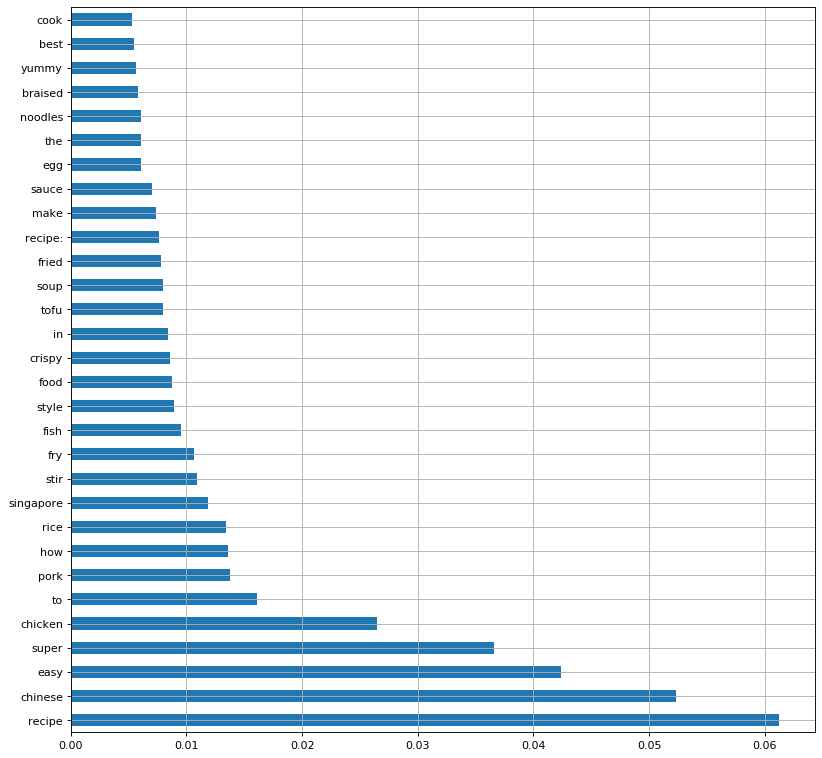

In [23]:
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
word_freq_top_10.plot(kind="barh")
plt.grid(True)
plt.show()

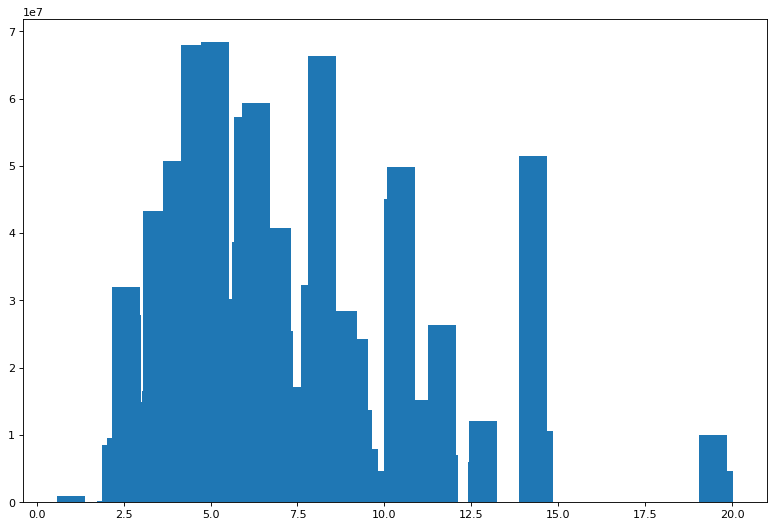

In [24]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.bar(df['duration_min'], df['views_int'])
plt.show()

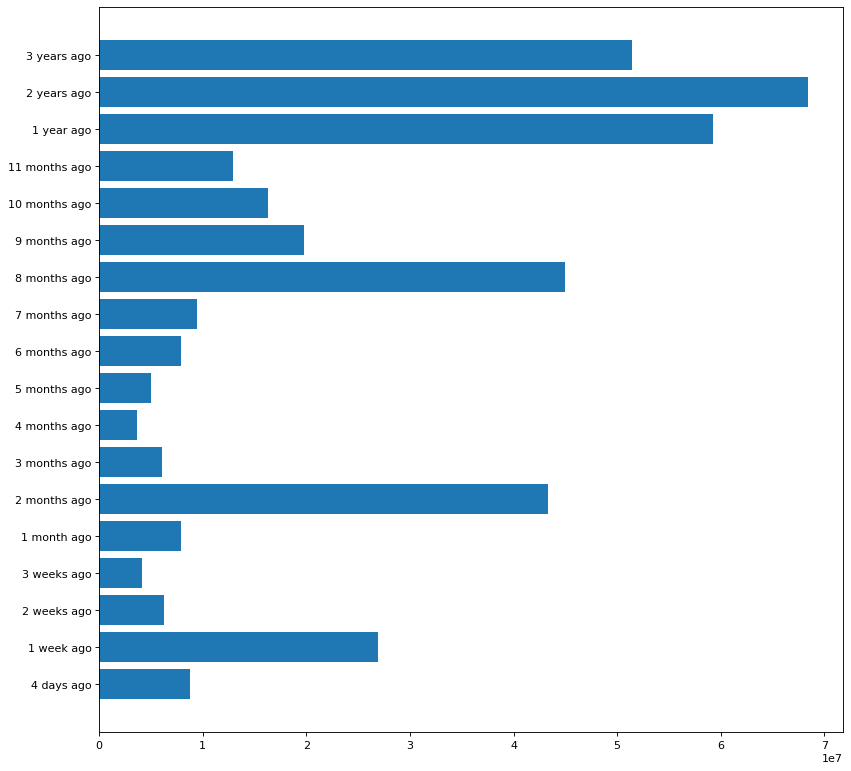

In [25]:
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
plt.barh(df['date_posted'], df['views_int'])
plt.show()